In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import sqlalchemy as alch
from getpass import getpass
import calendar
import pickle

import sys
sys.path.append("../")

import src.support as sp

import os
from dotenv import load_dotenv
load_dotenv()

True

## Game Analysis

General features of League of Legends: 
Belongs to genres Role-Playing, Strategy, Action RPG, Real-Time, MOBA
It is available on the next platforms: PC
The game developer is  Riot Games
Players type game:  Up to 10
Metacritics score is 78.0
User review score is 5.2


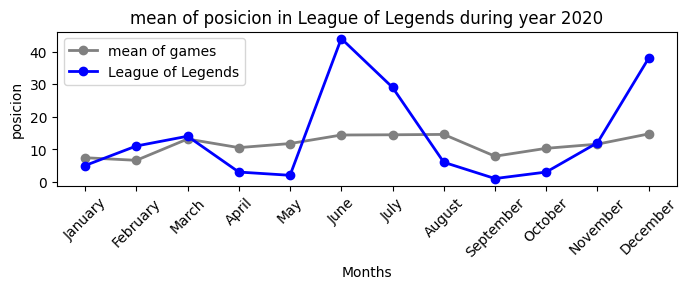

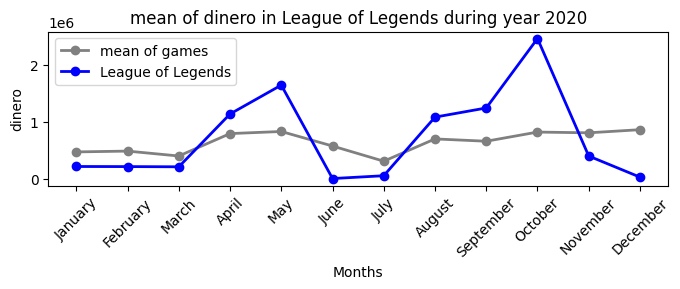

In [7]:
sp.data_visualization()